<a href="https://colab.research.google.com/github/Stephensingletary/Image-Classification-For-Cross-Analysis-of-Chest-X-Ray/blob/Patrick/model2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.applications import DenseNet201
from tensorflow.keras.applications.densenet import preprocess_input as densenet_preprocess_input
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import LearningRateScheduler
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import pathlib
import numpy as np
import matplotlib.pyplot as plt
import os


In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
image_path = pathlib.Path("/content/drive/MyDrive/labeled_images")

In [4]:
#Parameters
batch_size = 32
img_height = 256
img_width = 256

In [5]:
# Load the ResNet50 model with pre-trained weights
base_model = DenseNet201(weights='imagenet', include_top=False, input_shape=(img_height, img_width, 3))

In [6]:
# Freeze the base model layers
base_model.trainable = False

# Add a global average pooling layer
x = base_model.output
x = keras.layers.GlobalAveragePooling2D()(x)

In [7]:
# Add a fully connected layer with 1024 units and ReLU activation
x = keras.layers.Dense(1024, activation='relu')(x)

# Add a dropout layer with a rate of 0.2
x = keras.layers.Dropout(0.2)(x)

# Add a final output layer with 10 units and softmax activation
predictions = keras.layers.Dense(3, activation='sigmoid')(x)

In [8]:
# Create the model
model = keras.Model(inputs=base_model.input, outputs=predictions)

# Compile the model
model.compile(optimizer=Adam(learning_rate=0.0001), loss='categorical_crossentropy', metrics=['accuracy'])


In [9]:
# Define the image generators
train_datagen = ImageDataGenerator(preprocessing_function=densenet_preprocess_input)
valid_datagen = ImageDataGenerator(preprocessing_function=densenet_preprocess_input)

In [14]:
# Define the training directory
train_dir = '/content/drive/MyDrive/labeled_images'
train_dir = pathlib.Path(train_dir)

In [15]:
valid_dir = '/content/drive/MyDrive/labeled_images'
valid_dir = pathlib.Path(valid_dir)

In [16]:
# Load the training and validation datasets
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='categorical')

valid_generator = valid_datagen.flow_from_directory(
    valid_dir,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='categorical')


Found 5606 images belonging to 3 classes.
Found 5606 images belonging to 3 classes.


In [18]:
# Train the model
model.fit(
    train_generator,
    epochs=10,
    validation_data=valid_generator,
    steps_per_epoch=64,
    validation_steps=32
)
# Save the model
model.save('model2')


Epoch 1/10
64/64 [==============================] - 57s 891ms/step - loss: 0.6011 - accuracy: 0.6825 - val_loss: 0.5774 - val_accuracy: 0.6953
Epoch 2/10
64/64 [==============================] - 56s 878ms/step - loss: 0.6084 - accuracy: 0.6919 - val_loss: 0.5440 - val_accuracy: 0.7246
Epoch 3/10
64/64 [==============================] - 57s 888ms/step - loss: 0.5997 - accuracy: 0.6860 - val_loss: 0.5637 - val_accuracy: 0.7178
Epoch 4/10
64/64 [==============================] - 56s 884ms/step - loss: 0.6130 - accuracy: 0.6743 - val_loss: 0.5891 - val_accuracy: 0.6963
Epoch 5/10
64/64 [==============================] - 56s 885ms/step - loss: 0.5974 - accuracy: 0.6860 - val_loss: 0.5704 - val_accuracy: 0.7119
Epoch 6/10
64/64 [==============================] - 56s 884ms/step - loss: 0.5889 - accuracy: 0.6914 - val_loss: 0.5785 - val_accuracy: 0.7100
Epoch 7/10
64/64 [==============================] - 56s 882ms/step - loss: 0.5949 - accuracy: 0.6772 - val_loss: 0.5579 - val_accuracy: 0.7139

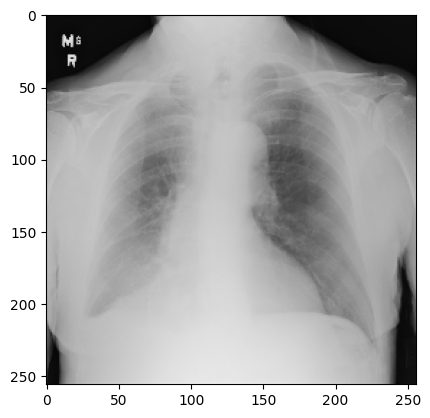

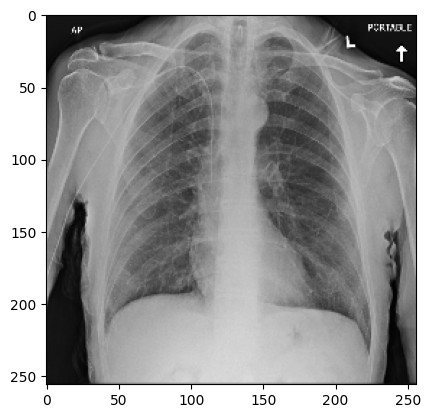

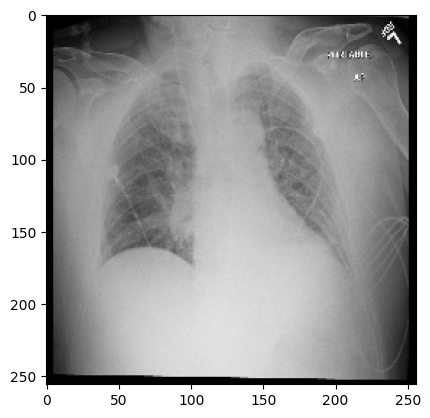

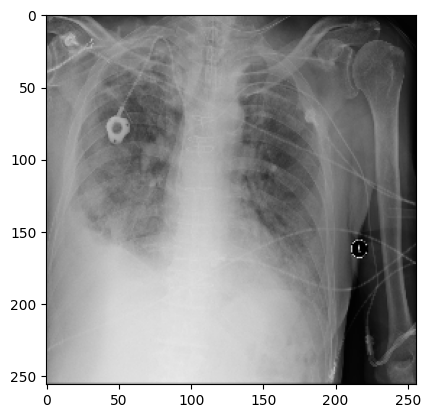

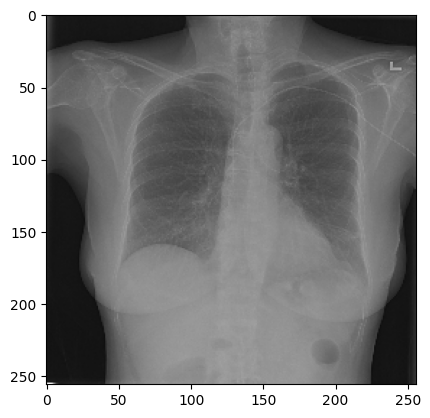

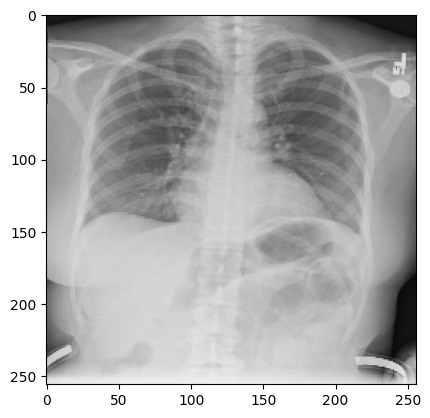

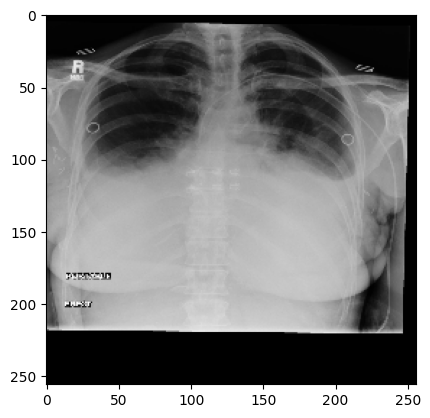

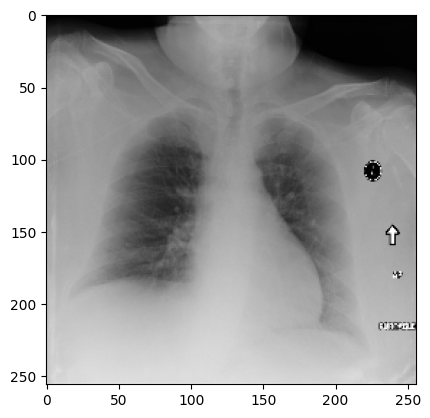

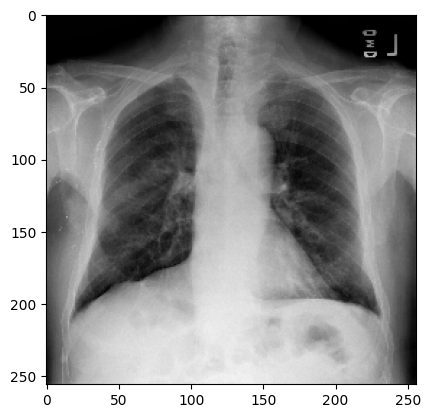

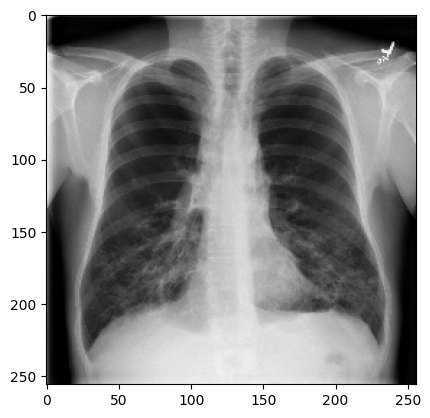

In [82]:
# prompt: add more images at the same time

import matplotlib.pyplot as plt
# Load multiple images from the training set
images = []
for i in range(10):
  image_path = train_generator.filepaths[i]
  image = tf.keras.preprocessing.image.load_img(image_path, target_size=(img_height, img_width))
  images.append(image)

# Display the images
for image in images:
  plt.imshow(image)
  plt.show()
